In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from model import *

/home/genjian.li/venv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from feature import *

In [4]:
%matplotlib inline
import seaborn
seaborn.set()

In [5]:
train_L.sum(axis=1).min()

1.0

In [6]:
%%time
train_biz_feats1, test_biz_feats1 = gen_aggregated_feature(aggs=[np.mean])
model1, test_L_pred1, cv_scores1, train_L_pred1 = run(
    train_biz_feats1, train_L, test_biz_feats1,
    model = OneVsRestClassifier(LogisticRegression(fit_intercept=False, C=0.1)),
    full_model = True,
    cv_evaluation=True)

cv score is: 0.820589599324
CPU times: user 8.05 s, sys: 314 ms, total: 8.36 s
Wall time: 12.2 s


In [7]:
train_labels['i'] = np.arange(train_labels.shape[0])
train_labels['f1'] = cv_scores1
train_labels['labels_pred'] = [decode_label(x) for x  in train_L_pred1]

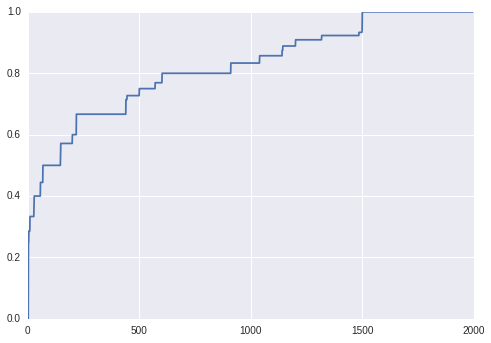

In [38]:
plt.plot(sorted(cv_scores1))

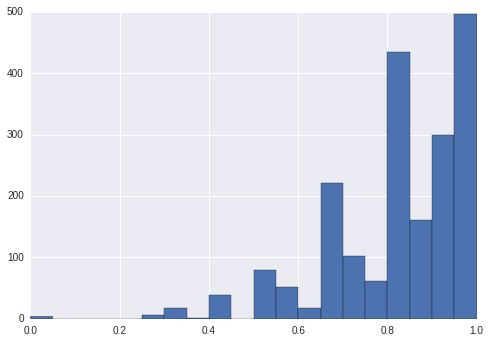

In [8]:
_ = plt.hist(cv_scores1, bins=20)

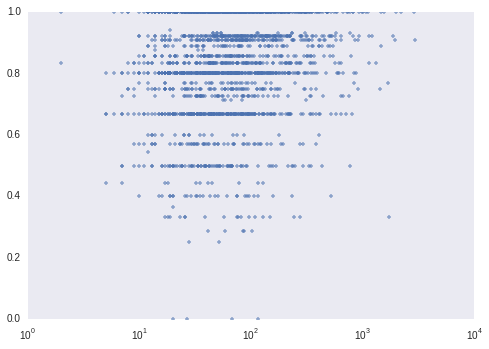

In [9]:
plt.semilogx(train_labels.n_photo.values, cv_scores1, '.', alpha=0.6)
plt.grid(False)

In [11]:
label_desc_dict

{0: 'good_for_lunch',
 1: 'good_for_dinner',
 2: 'takes_reservations',
 3: 'outdoor_seating',
 4: 'restaurant_is_expensive',
 5: 'has_alcohol',
 6: 'has_table_service',
 7: 'ambience_is_classy',
 8: 'good_for_kids'}

In [53]:
freq = train_labels.groupby(['labels', 'f1'])['i'].count().order(ascending=False)

/home/genjian.li/venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


In [60]:
freq_wide = freq.to_frame().to_panel()['i'].fillna(0)

In [83]:
pd.DataFrame.divide?

In [99]:
mean_f1 = ((freq_wide.columns.values * freq_wide).sum(axis=1)/freq_wide.sum(axis=1))

In [106]:
by_labels = pd.DataFrame({'mean_f1': mean_f1, 'freq': freq_wide.sum(axis=1)})

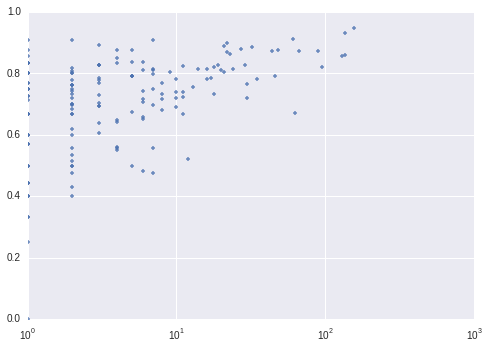

In [113]:
plt.semilogx(by_labels.freq, by_labels.mean_f1, '.', alpha=0.8)

In [122]:
by_labels.sort(['mean_f1', 'freq'], ascending=True).head(30)

/home/genjian.li/venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


freq   mean_f1
labels                                  
(5,)                         1  0.000000
(7,)                         1  0.250000
(0, 1, 5)                    1  0.333333
(2, 5, 8)                    1  0.333333
(0, 1)                       1  0.400000
(5, 6, 7)                    1  0.400000
(6,)                         1  0.400000
(1, 5)                       2  0.400000
(1, 2, 3, 8)                 2  0.428571
(2, 5, 7)                    1  0.444444
(0, 2, 5, 6, 7)              1  0.444444
(1, 7)                       1  0.444444
(0, 2, 8)                    2  0.476190
(0,)                         7  0.476190
(5, 8)                       6  0.483333
(0, 1, 2, 6)                 2  0.500000
(0, 2, 3, 5)                 1  0.500000
(2, 8)                       1  0.500000
(3, 4, 6)                    1  0.500000
(1, 2, 6)                    2  0.500000
(3,)                         5  0.500000
(0, 1, 2, 4, 5, 6, 7, 8)     2  0.515152
(1, 8)                      12  0.522619
(1, 3, 6, 8)                 2  0.535714
(0, 5, 6)                    4  0.551587
(0, 2, 5, 8)                 2  0.555556
(1, 3, 5, 8)                 4  0.556548
(1, 5, 6, 8)                 7  0.557978
(0, 3, 5)                    4  0.559524
(0, 1, 2, 8)                 1  0.571429

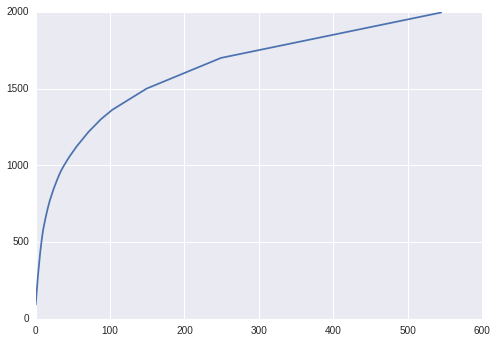

In [55]:
plt.plot(np.cumsum(freq.values))

In [125]:
train_labels.sort('f1', ascending=False).head(20)

/home/genjian.li/venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


labels  \
business_id                          
1000         (1, 2, 3, 4, 5, 6, 7)   
2760               (1, 2, 3, 5, 6)   
2677                     (0, 3, 8)   
2680                  (0, 3, 5, 8)   
2681                        (3, 8)   
2689         (1, 2, 3, 4, 5, 6, 7)   
2690         (1, 2, 3, 4, 5, 6, 7)   
2707                        (6, 8)   
271          (1, 2, 3, 4, 5, 6, 7)   
272             (1, 2, 4, 5, 6, 7)   
2753            (1, 2, 4, 5, 6, 7)   
2755                     (5, 6, 8)   
2784                        (0, 8)   
2659                        (0, 8)   
2803                          (8,)   
2812            (1, 2, 4, 5, 6, 7)   
2817            (1, 2, 4, 5, 6, 7)   
2820                        (0, 8)   
2833                        (3, 8)   
2841                     (0, 3, 8)   

                                                        photos  n_photo     i  \
business_id                                                                     
1000         [438623, 325966, 227692, 407856, 368729, 16319...       54     0   
2760         [356447, 149721, 142098, 307768, 362101, 19735...      146   979   
2677         [430972, 184792, 4011, 88871, 457135, 277563, ...       83   936   
2680         [344559, 84969, 321164, 311357, 445859, 214701...       51   938   
2681         [388859, 325212, 176543, 18709, 364360, 355684...       48   939   
2689         [133086, 237619, 148440, 384283, 26646, 346671...       59   945   
2690         [25679, 119644, 210551, 237069, 1072, 355971, ...      195   946   
2707         [271196, 393860, 469756, 62534, 224405, 376011...       18   953   
271          [72048, 114485, 77038, 293894, 432319, 409020,...       46   955   
272          [80278, 137429, 295303, 367361, 404603, 427523...       60   960   
2753         [121264, 263869, 264870, 312930, 174537, 77045...       48   974   
2755         [173303, 409556, 262478, 197841, 220697, 30366...       60   975   
2784         [37543, 116552, 322069, 437906, 233779, 235930...       50   990   
2659         [242722, 74329, 4119, 55890, 309839, 283820, 3...       15   926   
2803         [105694, 146593, 350627, 236269, 345121, 28710...       28  1001   
2812         [190658, 411667, 397022, 185428, 143004, 92240...      820  1008   
2817         [401288, 174204, 169386, 160444, 311429, 25461...       92  1012   
2820         [362111, 178486, 358043, 178610, 285454, 32844...       43  1013   
2833         [439921, 12504, 325130, 352268, 373190, 459608...       81  1018   
2841         [116752, 201406, 94563, 155446, 92509, 292498,...       12  1021   

             f1            labels_pred  
business_id                             
1000          1  (1, 2, 3, 4, 5, 6, 7)  
2760          1        (1, 2, 3, 5, 6)  
2677          1              (0, 3, 8)  
2680          1           (0, 3, 5, 8)  
2681          1                 (3, 8)  
2689          1  (1, 2, 3, 4, 5, 6, 7)  
2690          1  (1, 2, 3, 4, 5, 6, 7)  
2707          1                 (6, 8)  
271           1  (1, 2, 3, 4, 5, 6, 7)  
272           1     (1, 2, 4, 5, 6, 7)  
2753          1     (1, 2, 4, 5, 6, 7)  
2755          1              (5, 6, 8)  
2784          1                 (0, 8)  
2659          1                 (0, 8)  
2803          1                   (8,)  
2812          1     (1, 2, 4, 5, 6, 7)  
2817          1     (1, 2, 4, 5, 6, 7)  
2820          1                 (0, 8)  
2833          1                 (3, 8)  
2841          1              (0, 3, 8)

In [23]:
def show_pred_for_photos_in_biz(i):
    photo_ids = train_labels.loc[i].photos
    feats = train_feats[[train_id_to_index[x] for x in photo_ids]]
    pred = [decode_label(x) for x in model1.predict(feats)]
    show_photos(photo_ids, 5, 5, msgs=pred)

In [21]:
label_desc_dict

{0: 'good_for_lunch',
 1: 'good_for_dinner',
 2: 'takes_reservations',
 3: 'outdoor_seating',
 4: 'restaurant_is_expensive',
 5: 'has_alcohol',
 6: 'has_table_service',
 7: 'ambience_is_classy',
 8: 'good_for_kids'}

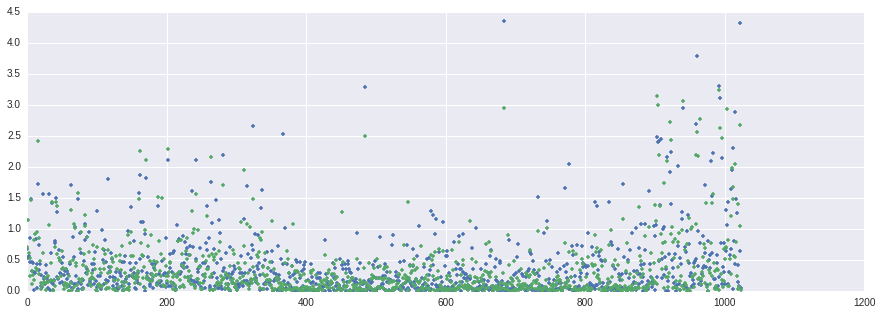

In [32]:
plt.figure(figsize=(15,5))
plt.plot(train_feats[train_id_to_index[365987]], '.')
plt.plot(train_feats[train_id_to_index[448981]], '.')

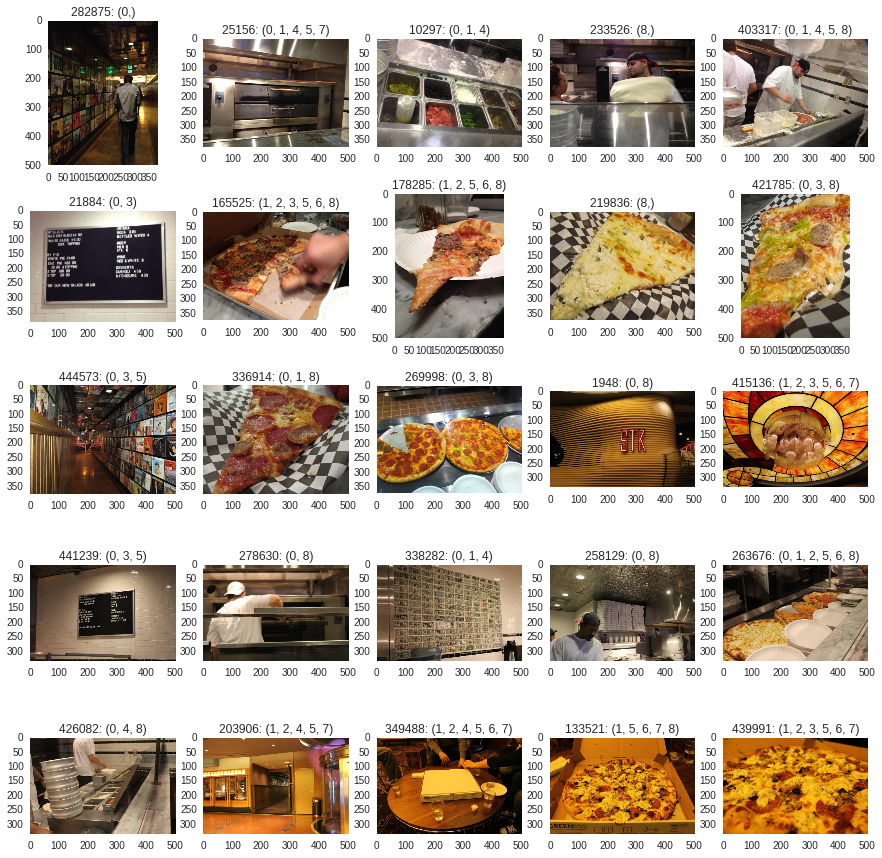

In [42]:
show_pred_for_photos_in_biz(1212)

In [44]:
train_labels.sort('f1', ascending=False).head(20)

/home/genjian.li/venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


labels  \
business_id                          
1000         (1, 2, 3, 4, 5, 6, 7)   
2760               (1, 2, 3, 5, 6)   
2677                     (0, 3, 8)   
2680                  (0, 3, 5, 8)   
2681                        (3, 8)   
2689         (1, 2, 3, 4, 5, 6, 7)   
2690         (1, 2, 3, 4, 5, 6, 7)   
2707                        (6, 8)   
271          (1, 2, 3, 4, 5, 6, 7)   
272             (1, 2, 4, 5, 6, 7)   
2753            (1, 2, 4, 5, 6, 7)   
2755                     (5, 6, 8)   
2784                        (0, 8)   
2659                        (0, 8)   
2803                          (8,)   
2812            (1, 2, 4, 5, 6, 7)   
2817            (1, 2, 4, 5, 6, 7)   
2820                        (0, 8)   
2833                        (3, 8)   
2841                     (0, 3, 8)   

                                                        photos  n_photo     i  \
business_id                                                                     
1000         [438623, 325966, 227692, 407856, 368729, 16319...       54     0   
2760         [356447, 149721, 142098, 307768, 362101, 19735...      146   979   
2677         [430972, 184792, 4011, 88871, 457135, 277563, ...       83   936   
2680         [344559, 84969, 321164, 311357, 445859, 214701...       51   938   
2681         [388859, 325212, 176543, 18709, 364360, 355684...       48   939   
2689         [133086, 237619, 148440, 384283, 26646, 346671...       59   945   
2690         [25679, 119644, 210551, 237069, 1072, 355971, ...      195   946   
2707         [271196, 393860, 469756, 62534, 224405, 376011...       18   953   
271          [72048, 114485, 77038, 293894, 432319, 409020,...       46   955   
272          [80278, 137429, 295303, 367361, 404603, 427523...       60   960   
2753         [121264, 263869, 264870, 312930, 174537, 77045...       48   974   
2755         [173303, 409556, 262478, 197841, 220697, 30366...       60   975   
2784         [37543, 116552, 322069, 437906, 233779, 235930...       50   990   
2659         [242722, 74329, 4119, 55890, 309839, 283820, 3...       15   926   
2803         [105694, 146593, 350627, 236269, 345121, 28710...       28  1001   
2812         [190658, 411667, 397022, 185428, 143004, 92240...      820  1008   
2817         [401288, 174204, 169386, 160444, 311429, 25461...       92  1012   
2820         [362111, 178486, 358043, 178610, 285454, 32844...       43  1013   
2833         [439921, 12504, 325130, 352268, 373190, 459608...       81  1018   
2841         [116752, 201406, 94563, 155446, 92509, 292498,...       12  1021   

             f1            labels_pred  
business_id                             
1000          1  (1, 2, 3, 4, 5, 6, 7)  
2760          1        (1, 2, 3, 5, 6)  
2677          1              (0, 3, 8)  
2680          1           (0, 3, 5, 8)  
2681          1                 (3, 8)  
2689          1  (1, 2, 3, 4, 5, 6, 7)  
2690          1  (1, 2, 3, 4, 5, 6, 7)  
2707          1                 (6, 8)  
271           1  (1, 2, 3, 4, 5, 6, 7)  
272           1     (1, 2, 4, 5, 6, 7)  
2753          1     (1, 2, 4, 5, 6, 7)  
2755          1              (5, 6, 8)  
2784          1                 (0, 8)  
2659          1                 (0, 8)  
2803          1                   (8,)  
2812          1     (1, 2, 4, 5, 6, 7)  
2817          1     (1, 2, 4, 5, 6, 7)  
2820          1                 (0, 8)  
2833          1                 (3, 8)  
2841          1              (0, 3, 8)

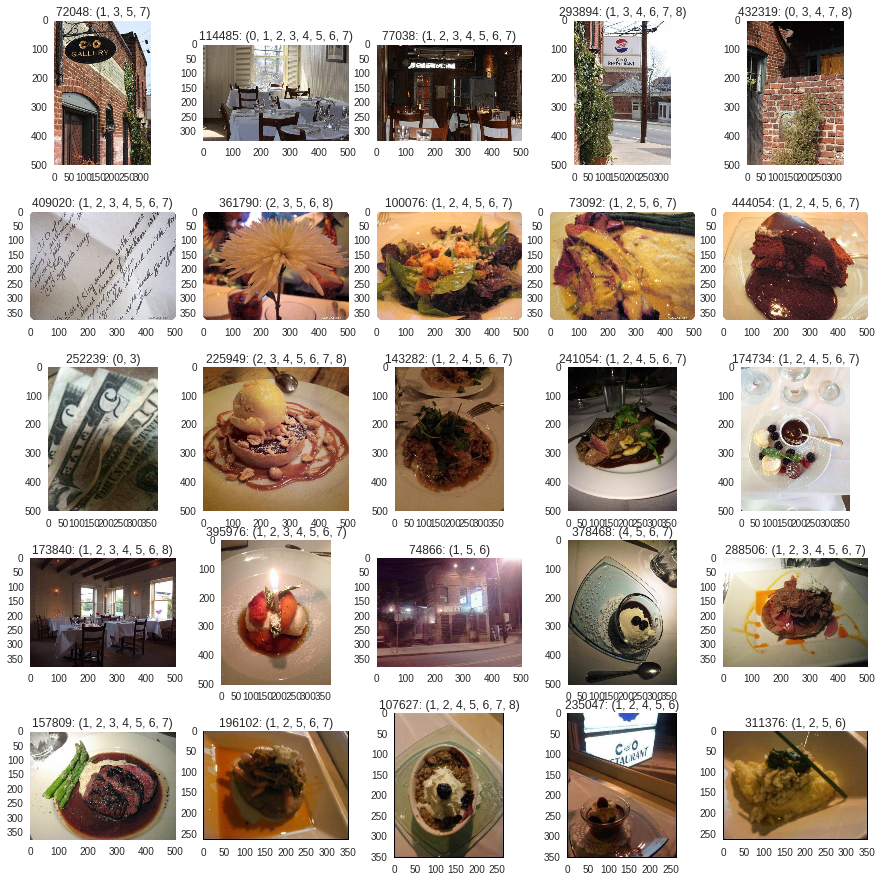

In [46]:
show_pred_for_photos_in_biz(271)